## Step 1: Set up notebook

In [53]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for a nicer layout
sns.set(style="whitegrid")

# Data set path
path = r"/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design"

# import amsterdam_listings_cleaned.csv (from 6.1)
df = pd.read_csv(os.path.join(path, '02 data' , 'Prepared Data' , 'amsterdam_listings_cleaned.csv'))

# First look at the data
df.head()


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,2818,https://www.airbnb.com/rooms/2818,20250302144653,2025-03-03,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,...,4.98,4.73,4.80,0363 5F3A 5684 6750 D14D,f,1,0,1,0,2.05
1,1,27886,https://www.airbnb.com/rooms/27886,20250302144653,2025-03-03,previous scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,...,4.92,4.89,4.77,0363 974D 4986 7411 88D8,f,1,0,1,0,1.84
2,2,28871,https://www.airbnb.com/rooms/28871,20250302144653,2025-03-03,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,...,4.94,4.94,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.83
3,3,29051,https://www.airbnb.com/rooms/29051,20250302144653,2025-03-03,city scrape,Comfortable single room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,...,4.92,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.67
4,4,44391,https://www.airbnb.com/rooms/44391,20250302144653,2025-03-03,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,...,4.90,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.24


## Step 2: Clean up DataFrame

In [55]:
# Extract relevant columns for analysis
cols_to_keep = [
    "neighbourhood_cleansed", "price", "host_is_superhost", "room_type",
    "reviews_per_month", "number_of_reviews_ltm",
    "host_total_listings_count", "has_availability", "availability_365"
]

# Reduce DataFrame (ignore columns that we do not need)
df_reduced = df[cols_to_keep].copy()

# Show preview
df_reduced.head()


,neighbourhood_cleansed,price,host_is_superhost,room_type,reviews_per_month,number_of_reviews_ltm,host_total_listings_count,has_availability,availability_365
0,Oostelijk Havengebied - Indische Buurt,66.0,t,Private room,2.05,31,1.0,t,10
1,Centrum-West,NaN,t,Private room,1.84,27,1.0,t,88
2,Centrum-West,75.0,t,Private room,3.83,94,2.0,t,84
3,Centrum-Oost,59.0,t,Private room,4.67,85,2.0,t,84
4,Centrum-Oost,NaN,f,Entire home/apt,0.24,0,1.0,t,0


## Step 3: Correlation matrix + heatmap

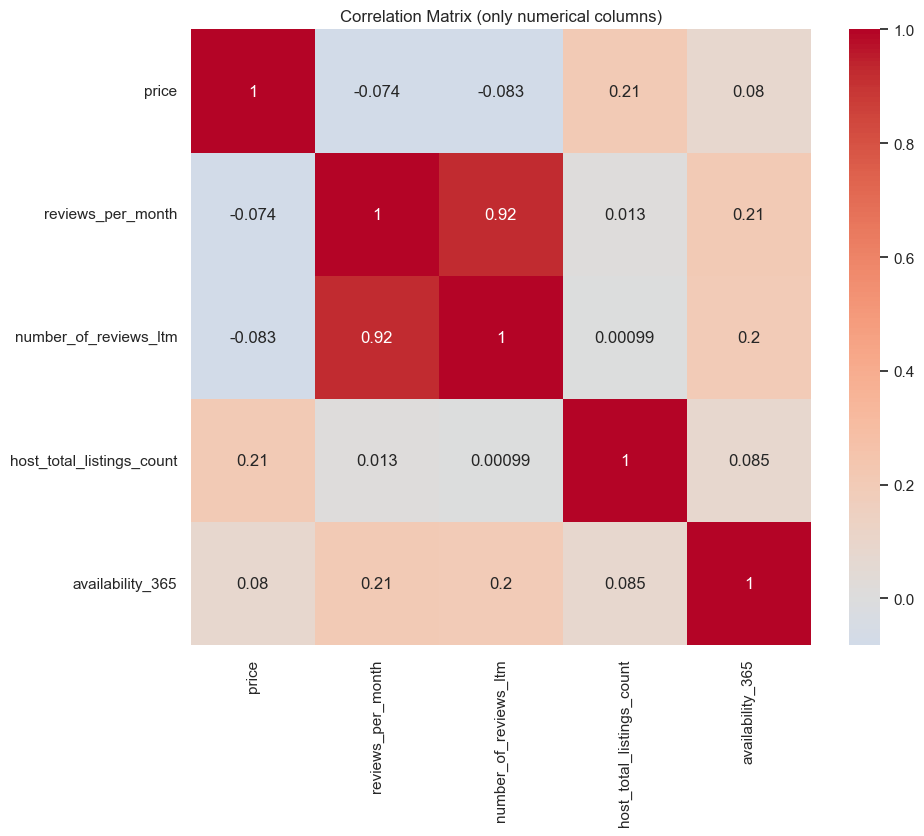

In [95]:
# Select only numerical columns for correlation matrix
df_numeric = df_reduced.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = df_numeric.corr()

# Create heatmap and save image
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (only numerical columns)")

# Save the figure BEFORE showing it
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/correlation_matrix.png"
fig.savefig(save_path, bbox_inches='tight', dpi=300)

# Now display it
plt.show()

### Interpretation of the Correlation Matrix

The correlation matrix shows how strongly the numerical variables in my dataset are related. Here are the key insights:

- **`price`** shows only **weak correlations** with the other variables:
  - With **`host_total_listings_count`**: **0.21** → a slight positive relationship. Hosts with more listings tend to charge slightly higher prices.
  - With **`availability_365`**: **0.08** → almost no correlation.
  - With **`reviews_per_month`**: **-0.07**, and with **`number_of_reviews_ltm`**: **-0.08** → slight negative correlation. This might suggest that cheaper listings receive more frequent reviews.

- Very strong positive correlation between:
  - **`reviews_per_month`** and **`number_of_reviews_ltm`**: **0.92** → This makes sense, as both variables measure review activity and are naturally related.

- **`availability_365`** has a weak positive correlation with review activity:
  - With **`reviews_per_month`**: **0.21**
  - With **`number_of_reviews_ltm`_**


## Step 4: Scatterplots for strongly correlated variables

- Since we have seen in the heatmap that host_total_listings_count has the strongest (albeit weak) correlation with price, and reviews_per_month has a slightly negative correlation, we plot both combinations:

### 1. Scatterplot: host_total_listings_count vs. price

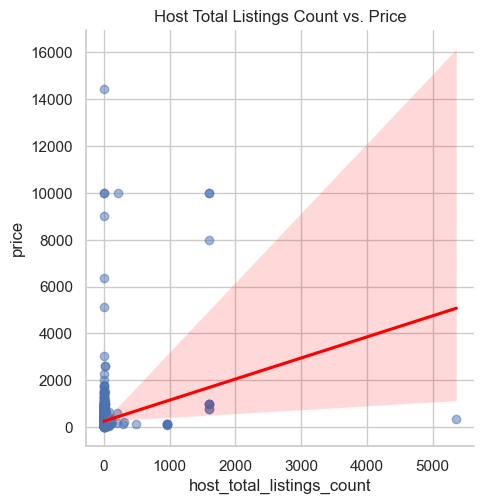

In [101]:
# Create scatterplot with regression line
sns.lmplot(data=df_reduced, x="host_total_listings_count", y="price",
           scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Add a title
plt.title("Host Total Listings Count vs. Price")

# Define save path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/Scatter_host_listings_vs_price.png"

# Save the figure BEFORE displaying it
plt.savefig(save_path, bbox_inches='tight', dpi=300)

# Now show the plot
plt.show()


### 2. Scatterplot: reviews_per_month vs. price

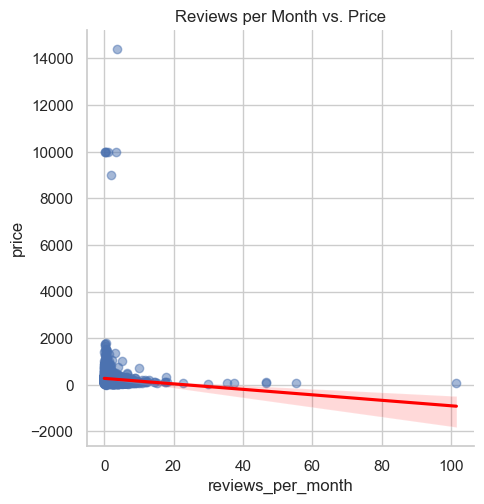

In [103]:
# Create scatterplot with regression line
sns.lmplot(data=df_reduced, x="reviews_per_month", y="price",
           scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Add a title
plt.title("Reviews per Month vs. Price")

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/reviews_per_month_price.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now show the plot
plt.show()

### Scatterplots: Relationship with Price

#### 1. Host Total Listings Count vs. Price

The scatterplot shows a very weak positive relationship between the total number of listings a host has and the price per listing. The regression line suggests that hosts with more listings might charge slightly more on average, but the data points are widely scattered. This indicates that the relationship is not very strong and other factors likely play a larger role in determining the price.

#### 2. Reviews per Month vs. Price

This plot shows a very weak negative correlation between the number of reviews per month and price. Listings with lower prices appear to receive more frequent reviews. This could suggest that cheaper listings are more attractive to frequent bookers or budget travelers, leading to a higher review frequency.

**Conclusion:** Neither variable shows a strong linear relationship with price. This further supports the idea that categorical factors like room type or neighbourhood might better explain price differences in Airbnb listings.


## Step 5: Pair plot for an overview of all numeric variables

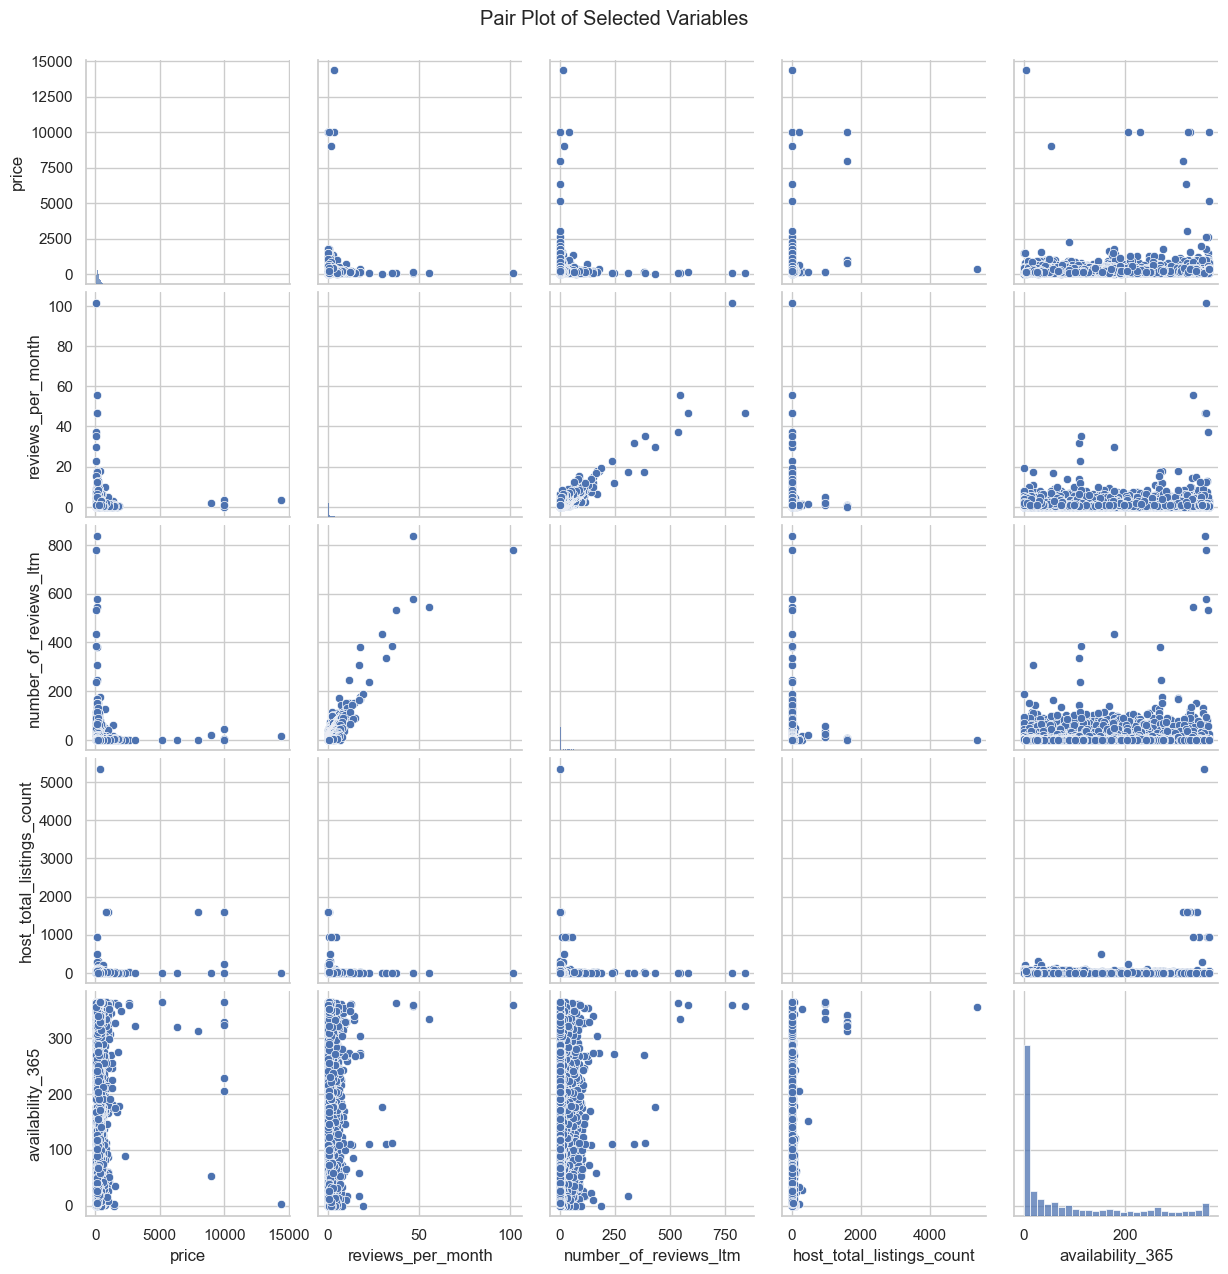

<Figure size 640x480 with 0 Axes>

In [66]:
# Pair plot for all numeric variables in the reduced data set
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_reduced)
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()

# Save image
plt.savefig("pair_plot_overview.jpg", format="jpg", dpi=300, bbox_inches="tight")

### Pair Plot: Visual Overview of Variable Relationships

This pair plot provides a combined view of the distributions of all selected numeric variables, as well as the scatterplot relationships between them.

#### Key Observations:

- **`reviews_per_month` and `number_of_reviews_ltm`** show a very clear, strong linear relationship. This confirms the correlation coefficient of 0.92 we saw earlier.

- **`host_total_listings_count` and `price`** display a widely scattered pattern, with no clear trend. Some high-price listings appear across the spectrum of host listing counts, suggesting that other factors likely drive price.

- **`availability_365`** shows slightly positive associations with both review metrics, meaning listings that are available year-round might accumulate more reviews.

- **`price`** is more evenly distributed than expected, but still shows some outliers (very high-priced listings). These could be interesting for further investigation.

**Next steps:** Based on this visual exploration, it would make sense to explore the influence of **categorical variables** like `room_type`, `host_is_superhost`, or `neighbourhood` on price in the next steps, as the numerical ones show only weak or mixed relationships.


## Step 6: Categorical plot

Now let's analyze how the price differs by category - for example:

- room_type (Entire home vs. Private room ...)
- host_is_superhost (Superhost or not)

### Example 1: Price by room type (room_type)

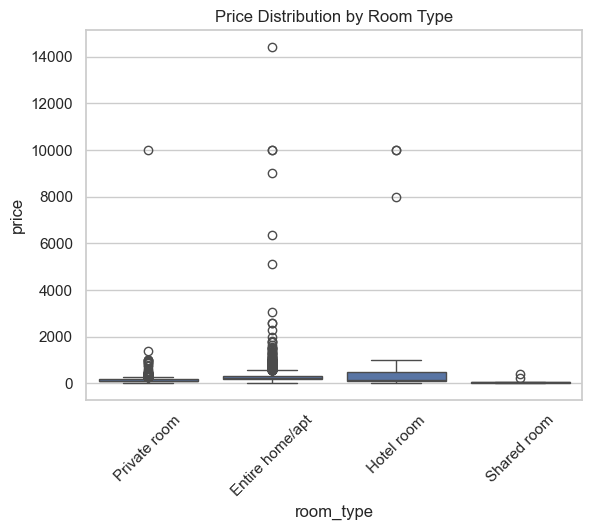

In [105]:
# Create boxplot
sns.boxplot(data=df_reduced, x="room_type", y="price")
plt.title("Price Distribution by Room Type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/price_distribution_room_type.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now show the plot
plt.show()

### Example 2: Price by superhost (host_is_superhost)

- First make sure that the column has the correct type:

In [72]:
# Optional: Convert string to Boolean if necessary

df_reduced["host_is_superhost"] = df["host_is_superhost"].map({"t": True, "f": False})

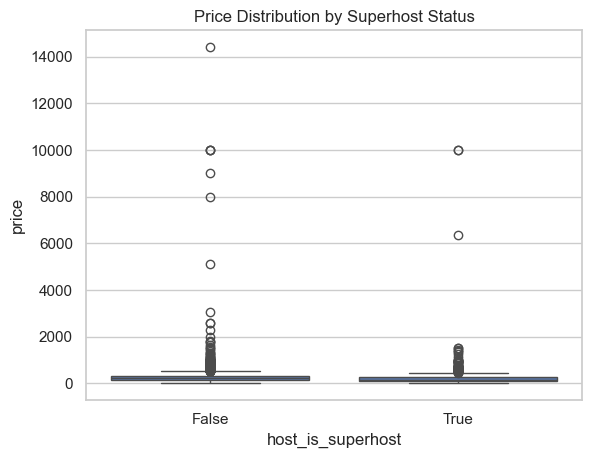

In [107]:
# Create boxplot
sns.boxplot(data=df_reduced, x="host_is_superhost", y="price")
plt.title("Price Distribution by Superhost Status")

# Define the file path
save_path = "/Users/martin/anaconda_projects/24-03-2025 Advanced Analytics & Dashboard Design/04 Analysis/Visualizations/price_distribution_superhost_status.jpg"

# Save the figure BEFORE displaying it
plt.savefig(save_path, format="jpg", dpi=300, bbox_inches="tight")

# Now show the plot
plt.show()


### Categorical Plots: Price Distribution by Room Type and Superhost Status

#### 1. Room Type vs. Price

The boxplot shows clear differences in price distribution across room types:

- **Entire home/apt** listings tend to have significantly higher prices, with a wide range and some high-price outliers.
- **Private rooms** are considerably cheaper and have a tighter distribution.
- **Shared rooms** (if present) are the lowest-priced category.

This suggests that **room type is a strong factor influencing price**, which is intuitive — larger, more private spaces naturally come with a higher cost.

#### 2. Superhost Status vs. Price

The plot comparing **superhosts** and **non-superhosts** reveals that:

- Both groups have overlapping price ranges, but superhosts tend to have slightly higher median prices.
- There are high-priced listings in both categories, indicating that **being a superhost is not a strong price driver on its own**, but may reflect a tendency toward higher-quality or more premium listings.

**Conclusion:** Categorical variables like `room_type` have a **clearer influence on price** than most numerical variables. `host_is_superhost` may be a secondary signal, potentially linked to quality or trust, but not a strong pricing factor on its own.


## Step 7: Answering the questions & formulating hypotheses

### Revisiting Initial Questions & Hypothesis Building

#### 1. What is the average price of Airbnb listings in Amsterdam, and how does it vary by neighbourhood?

**Not yet fully explored** – this requires grouping the data by `neighbourhood` and calculating average prices. However, it's a key question for further analysis.

**Hypothesis:** Prices are higher in central and tourist-frequented neighbourhoods (e.g., Jordaan, De Pijp).

---

#### 2. Do superhosts tend to charge more per night than non-superhosts?

**Partially answered:** The boxplot shows that superhosts have a **slightly higher median price**, but the overlap in price ranges is substantial.

**Hypothesis:** Being a superhost alone does not drastically affect price, but may be correlated with other quality factors that do.

---

#### 3. How does room type (e.g., entire home vs. private room) influence listing price?

**Clearly answered:** The price differences between room types are **significant**. Entire homes are much more expensive than private rooms.

**Hypothesis:** Room type is one of the **most influential variables** on price.

---

#### 4. Is there a relationship between the number of reviews per month and listing price?

**Partially answered:** There is a **slight negative correlation** between `reviews_per_month` and `price`, suggesting that **cheaper listings may be booked (and reviewed) more frequently**.

**Hypothesis:** Listings with lower prices attract more frequent bookings, resulting in more reviews per month.

---

#### 5. Which neighbourhoods have the highest number of listings and the greatest availability?

**Not yet analyzed** – requires grouping by `neighbourhood` and aggregating `host_total_listings_count` and `availability_365`.

**Hypothesis:** Central neighbourhoods have more listings, but outer areas may show higher year-round availability due to lower demand.

---

### Summary of Current Hypotheses

1. Room type has a strong impact on price.
2. Superhost status has a minor influence on price.
3. Listings with lower prices tend to get more reviews per month.
4. Neighbourhood likely plays a major role in both price and availability (to be confirmed).

These hypotheses will guide the next steps in analysis and will be tested quantitatively in later exercises.


## Step 8: Exporting notebook

In [90]:
# Export data to csv

df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'amsterdam_listings_relationships.csv'), index=False)